In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
tr_mush = pd.read_csv('C:\\Users\\Lo_Sci\\Desktop\\Py\\Kurs_DatSci\\urok35\\training_mush.csv')
tr_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [5]:
x = tr_mush.drop(['class'], axis = 1)
y = tr_mush['class']

In [6]:
#подбор параметров леса
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state = 0)
search = GridSearchCV(rf, {'n_estimators': range(10, 50, 10), 
                           'max_depth': range(1, 12, 2), 
                           'min_samples_split': range(2, 9), 
                           'min_samples_leaf': range(1, 7)}, 
                      cv=3, n_jobs=-1)
search.fit(x, y)
best_rf = search.best_estimator_

In [9]:
importances = best_rf.feature_importances_
feature_names = x.keys()

Elapsed time to compute the importances: 0.000 seconds


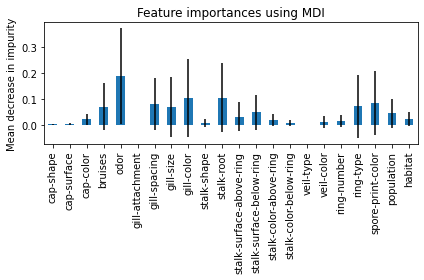

In [10]:
forest_importances = pd.Series(importances, index=feature_names)

start_time = time.time()
std = np.std([
    tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [11]:
search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [12]:
test_mush = pd.read_csv('C:\\Users\\Lo_Sci\\Desktop\\Py\\Kurs_DatSci\\urok35\\testing_mush.csv')
test_mush.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,...,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,...,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,...,1,6,6,0,2,1,0,7,4,4


In [14]:
# предсказываем класс
predicted_data = best_rf.predict(test_mush)
# количество несъедобных (класс 1) среди тестовой выборки
print('количество несъедобных грибов:', predicted_data.sum())

количество несъедобных грибов: 976


In [15]:
# сравниваем с правильными ответами
right_data = pd.read_csv('C:\\Users\\Lo_Sci\\Desktop\\Py\\Kurs_DatSci\\urok35\\testing_y_mush.csv\\testing_y_mush.csv')
from sklearn.metrics import confusion_matrix
confusion_matrix(right_data, predicted_data)

array([[1055,    0],
       [   0,  976]], dtype=int64)